# k-Nearest Neighbours Classification

In [22]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import sklearn.datasets as datasets
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 8]
np.random.seed(30)

In [23]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

split = 100
i = np.random.permutation(np.arange(150))

X_train = X[i][:split, :]
y_train = y[i][:split]
X_test = X[i][split:, :]
y_test = y[i][split:]

In [11]:
k = 3

In [4]:
h = 0.02

In [ ]:
def my_knn_predict(X_tr, y_tr, num_neighbours, distance_measure, x):
    num_data_points_train = X_tr.shape[0]
    distances = np.inf * np.ones((num_data_points_train,))
    for i in range(num_data_points_train):
        distances[i] = distance_measure(x, X_tr[i, :])
    nearest = np.argsort(distances)
    prediction = np.max(y_tr[nearest][:num_neighbours])
    return prediction

In [ ]:
def euclidian_distance(p, q):
    return np.sqrt((p - q) @ (p - q))

In [ ]:
num_data_points_test = X_test.shape[0]
yhat2_test = -1 * np.ones((num_data_points_test,), dtype=int)
for i in range(num_data_points_test):
    yhat2_test[i] = my_knn_predict(X_train, y_train, k, euclidian_distance, X_test[i, :])

In [ ]:
(x_v0_min, x_v0_max) = (X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
(x_v1_min, x_v1_max) = (X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
(XX_v0, XX_v1) = np.meshgrid(np.arange(x_v0_min, x_v0_max, h), np.arange(x_v1_min, x_v1_max, h))

XX_v = np.c_[XX_v0.ravel(), XX_v1.ravel()]
num_data_points_v = XX_v.shape[0]
yhat2_v = -1 * np.ones((num_data_points_v,), dtype=int)
for i in range(num_data_points_v):
    yhat2_v[i] = my_knn_predict(X_train, y_train, k, euclidian_distance, XX_v[i, :])

YYhat2_v = yhat2_v.reshape(XX_v0.shape)
plt.figure()
plt.set_cmap(plt.cm.tab20)
plt.pcolormesh(XX_v0, XX_v1, (2 * YYhat2_v) + 1, vmin=0, vmax=19)

plt.scatter(X_train[:,0], X_train[:,1], c=(2 * y_train) + 1, vmin=0, vmax=19, edgecolors='black')
plt.scatter(X_test[:,0], X_test[:,1], c=2 * y_test, vmin=0, vmax=19, edgecolors='black')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(XX_v0.min(), XX_v0.max())
plt.ylim(XX_v1.min(), XX_v1.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [63]:
k = 3

In [64]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train);

In [65]:
yhat_test = knn.predict(X_test)

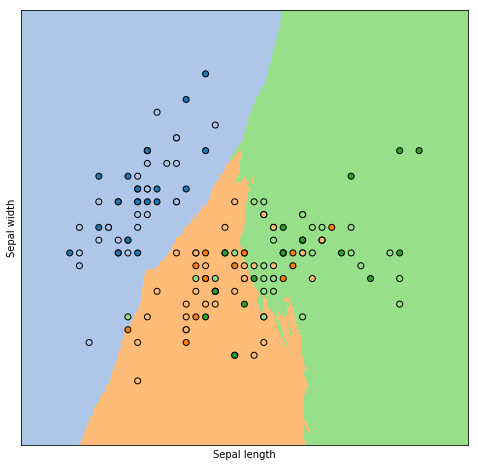

In [66]:
(x_v0_min, x_v0_max) = (X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
(x_v1_min, x_v1_max) = (X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
(XX_v0, XX_v1) = np.meshgrid(np.arange(x_v0_min, x_v0_max, h), np.arange(x_v1_min, x_v1_max, h))
yhat_v = knn.predict(np.c_[XX_v0.ravel(), XX_v1.ravel()])

YYhat_v = yhat_v.reshape(XX_v0.shape)
plt.figure()
plt.set_cmap(plt.cm.tab20)
plt.pcolormesh(XX_v0, XX_v1, (2 * YYhat_v) + 1, vmin=0, vmax=19)

plt.scatter(X_train[:,0], X_train[:,1], c=(2 * y_train) + 1, vmin=0, vmax=19, edgecolors='black')
plt.scatter(X_test[:,0], X_test[:,1], c=2 * y_test, vmin=0, vmax=19, edgecolors='black')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(XX_v0.min(), XX_v0.max())
plt.ylim(XX_v1.min(), XX_v1.max())
plt.xticks(())
plt.yticks(())

plt.show()